# 5 cell 800 MHz rectangular cavity 


* [PERLE collaboration meeting cavity talk](https://indico.ijclab.in2p3.fr/event/7907/contributions/24619/attachments/18114/23933/Rimmer_ERL_cavity.pdf)
* [PERLE HOM coupler](https://accelconf.web.cern.ch/linac2022/papers/thpojo21.pdf)

Cavity angular frequency $\omega$ as a function of radius $R$
$$ \omega = 2\pi f = \frac{2.405c}{R} $$

So for a $\pi$ mode cavity the distance between two cells is 

$$ l_{\rm cell} = \frac{1}{2f} c$$

For an $n_{\rm cell}$ cavity the total cavity length is then 

$$ l_{\rm cavity} = n_{\rm cell} l_{\rm cell}$$

In [2]:
import numpy as np

def freq_from_radius(radius_m) :
    return 2.405*3e8/radius_m/1e9/2/np.pi

def radius_from_freq(freq_ghz) : 
    return 2.405*3e8/(2*np.pi*freq_ghz*1e9)

def cell_length(freq_ghz) :
    return 1./(freq_ghz*1e9)/2*3e8

In [3]:
rcell = radius_from_freq(0.8)
lcell = cell_length(0.8)
lcav  = 5*lcell
print(f"rcell={rcell:5.3} lcell={lcell:5.3} lcav={lcav:5.3}")

rcell=0.144 lcell=0.188 lcav=0.938


In [1]:
import pyCavity2d
#b_sc = pyCavity2d.DomainLoader.load2d_boundary("pillbox_0.8GHz.dat")
b_sc = pyCavity2d.DomainCreator.make2d_rectangular(cavity_freqnecy_ghz=0.8,
                                                   iris_thickness=0.005,
                                                   iris_radius=0.03)
d_sc = pyCavity2d.Domain2D(b_sc,single_cell=True,maxh=0.01)
fc_sc = pyCavity2d.FieldCalculator(d_sc)
fc_sc.compute(maxit=200)

('zmin', 'default', 'default', 'default', 'default', 'default', 'zmax', 'rmin')
0 -4.787388213069365e-13 freq:  nan MHz
1 284.9258678214877 freq:  805.3910041489219 MHz
2 603.2087357102014 freq:  1171.8570733163644 MHz
3 1516.350511745152 freq:  1857.9782925075365 MHz
4 1559.3968394431383 freq:  1884.1659859842284 MHz
5 1878.0619868073793 freq:  2067.739364805653 MHz
6 2831.671780791202 freq:  2538.997603715165 MHz
7 3152.308526797404 freq:  2678.8919236964402 MHz
8 3780.5349515879275 freq:  2933.711905792709 MHz
9 4159.091786535759 freq:  3077.089207484144 MHz


/Users/stewart.boogert/Dropbox/Physics/coderepos/pyCavity2d/src/pyCavity2d/FieldCalculator.py:59: RuntimeWarning: invalid value encountered in sqrt
  self.eigen_freq.append(c0 * _np.sqrt(lam) / (2 * _np.pi) * 1e-6)
/Users/stewart.boogert/Dropbox/Physics/coderepos/pyCavity2d/src/pyCavity2d/FieldCalculator.py:60: RuntimeWarning: invalid value encountered in sqrt
  print(i, lam, 'freq: ', c0 * _np.sqrt(lam) / (2 * _np.pi) * 1e-6, "MHz")


In [4]:
fc_sc.draw(1)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

In [1]:
import pyCavity2d
import matplotlib.pyplot as _plt
import numpy as _np
b_sc = pyCavity2d.DomainCreator.make2d_rectangular(cavity_freqnecy_ghz=0.8,
                                                   iris_thickness=0.005,
                                                   iris_radius=0.03)
#b_sc = pyCavity2d.DomainLoader.load2d_boundary("pillbox_0.8GHz.dat")
b_mc = pyCavity2d.DomainLoader.make_boundary_repeat(b_sc,5)
d_mc = pyCavity2d.Domain2D(b_mc,single_cell=True,maxh=0.0025)
fc_mc = pyCavity2d.FieldCalculator(d_mc)
fc_mc.compute(maxit=200)

0.18737028625000002
('zmin', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'zmax', 'rmin')
0 -2.3934552061131412e-12 freq:  nan MHz
1 282.76689820170196 freq:  802.3338560851643 MHz
2 283.363680420157 freq:  803.1800764349978 MHz
3 284.1061552964435 freq:  804.2316418683868 MHz
4 284.7109419080654 freq:  805.0871846781756 MHz
5 284.94047024071637 freq:  805.4116419844687 MHz
6 598.1013079316216 freq:  1166.8854124280672 MHz
7 599.2852153161838 freq:  1168.0397330020905 MHz
8 600.7948172262701 freq:  1169.509956143844 MHz
9 602.0664140419561 freq:  1170.7469500646248 MHz


/Users/stewart.boogert/Dropbox/Physics/coderepos/pyCavity2d/src/pyCavity2d/FieldCalculator.py:59: RuntimeWarning: invalid value encountered in sqrt
  self.eigen_freq.append(c0 * _np.sqrt(lam) / (2 * _np.pi) * 1e-6)
/Users/stewart.boogert/Dropbox/Physics/coderepos/pyCavity2d/src/pyCavity2d/FieldCalculator.py:60: RuntimeWarning: invalid value encountered in sqrt
  print(i, lam, 'freq: ', c0 * _np.sqrt(lam) / (2 * _np.pi) * 1e-6, "MHz")


In [2]:
fc_mc.draw(5,field="E")
fc_mc.vtk(5,field="E")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

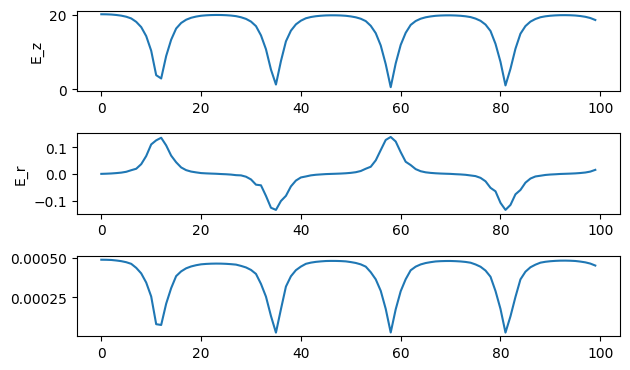

In [32]:
e = fc_mc.plotAxialFields(5,field="E")
b = fc_mc.plotAxialFields(5,field="B")

_plt.subplot(4,1,1)
_plt.plot(_np.abs(e[:,0]))
_plt.ylabel("E_z")
_plt.subplot(4,1,2)
_plt.plot(e[:,1])
_plt.ylabel("E_r")


_plt.subplot(4,1,3)
_plt.plot(_np.abs(_np.imag(b[:,0])))
_plt.

_plt.tight_layout()